# 環境確認

In [1]:
!nvidia-smi

Wed Nov  8 15:28:16 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

確認是否有Tensorflow、Pytorch的套件

In [2]:
import tensorflow as tf
print('Tensorflow版本為:', tf.__version__)

import torch
print('Pytorch版本為:', torch.__version__)

Tensorflow版本為: 2.14.0
Pytorch版本為: 2.1.0+cu118


確認Tensorflow、Pytorch能否調用GPU

In [3]:
print("Tensorflow是否可使用GPU:", tf.test.is_gpu_available())
print("Pytorch是否可使用GPU:", torch.cuda.is_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Tensorflow是否可使用GPU: True
Pytorch是否可使用GPU: True


# 建立一個簡單的ANN模型

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

建立假資料，包含3個x及1個y的二元分類問題

In [5]:
# Generate some random data for training
# 1000 samples with 3 features
X_train = np.random.random((1000, 3))
# Binary labels (0 or 1)
y_train = np.random.randint(2, size=(1000, 1))

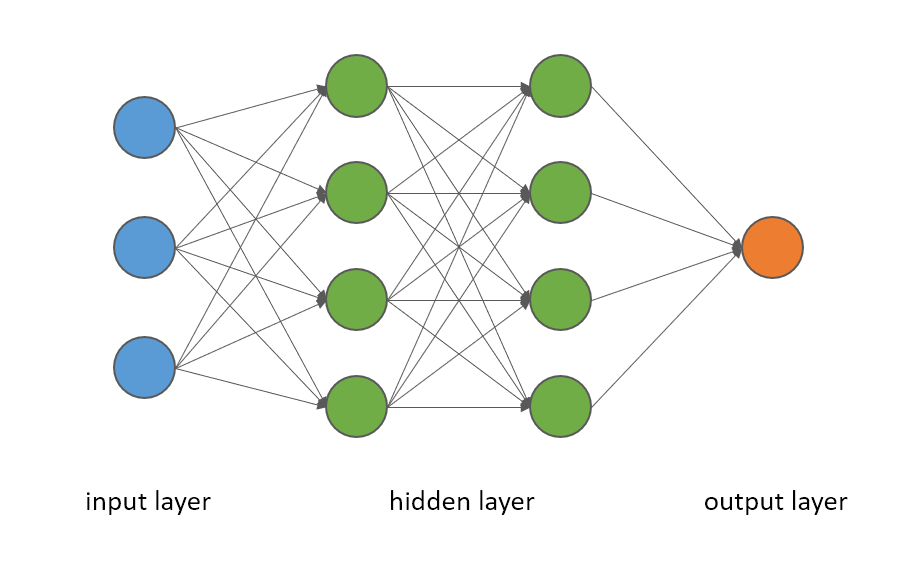

做一個2層hidden layer的神經網路模型<br>
每層有4個神經元，激活函數使relu<br>
最後用sigmoid輸出二元分類的預測

In [6]:
# 創建一個模型
model = Sequential()

# 增加一層4個神經元的隱藏層，激活函數使用relu
model.add(Dense(4, activation='relu'))

# 再增加一層4個神經元的隱藏層，激活函數使用relu
model.add(Dense(4, activation='relu'))

# 為了進行分類，增加一個輸出層，激活函數使用sigmoid
model.add(Dense(1, activation='sigmoid'))

損失函數：二元分類問題，使用binary_crossentropy <br>
優化器：選擇流行的adam <br>
衡量指標：選擇經典的準確率accuracy

In [7]:
# 編譯模型
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

開始進行訓練

In [8]:
# 訓練模型
model.fit(X_train, y_train, epochs=10, batch_size=5)

Epoch 1/10
200/200 [==============================] - 10s 3ms/step - loss: 0.6937 - accuracy: 0.5140
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6910 - accuracy: 0.5120
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6911 - accuracy: 0.5180
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6905 - accuracy: 0.5160
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6901 - accuracy: 0.5250
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6897 - accuracy: 0.5320
Epoch 7/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6902 - accuracy: 0.5130
Epoch 8/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6895 - accuracy: 0.5250
Epoch 9/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6895 - accuracy: 0.5370
Epoch 10/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6893 - accuracy: 0.522

衡量模型指標，顯示最後的準確率結果

In [9]:
# 評估模型，使用訓練資料
scores = model.evaluate(X_train, y_train)
print("accuracy:" , round(scores[1]*100,4),'%')

32/32 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.5230
accuracy: 52.3 %


Keras的模型結構預覽

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 16        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


模型結構圖

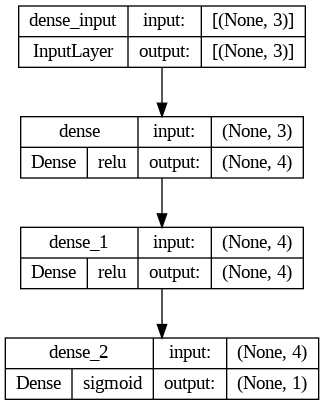

In [11]:
from keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, show_layer_activations=True)

喜歡躺著看的也可以，但是太多層不適合

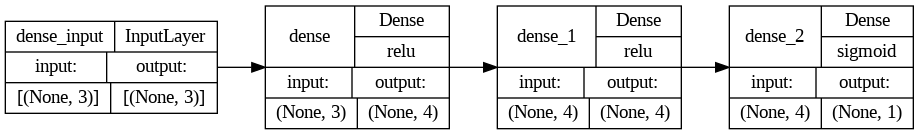

In [12]:
plot_model(model, show_shapes=True, show_layer_names=True, show_layer_activations=True, rankdir='LR')

將上面所有程式碼進行整合 <br>
重新看一次模型結構

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# 產生隨機的訓練資料
X_train = np.random.random((1000, 3))
# Binary labels (0 or 1)
y_train = np.random.randint(2, size=(1000, 1))

# 建立模型
model = Sequential()

# 第一層隱藏層，4個神經元，激活函數為relu
model.add(Dense(4, activation='relu'))

# 第二層隱藏層，4個神經元，激活函數為relu
model.add(Dense(4, activation='relu'))

# 輸出層，使用sigmoid輸出0-1的二元機率
model.add(Dense(1, activation='sigmoid'))

# 編譯模型
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 訓練模型
model.fit(X_train, y_train, epochs=10, batch_size=5)

# 使用評估模型，這邊用訓練資料
scores = model.evaluate(X_train, y_train)
print("accuracy:" , round(scores[1]*100,4),'%')

Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6942 - accuracy: 0.5010
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6936 - accuracy: 0.5060
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6935 - accuracy: 0.4980
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6934 - accuracy: 0.4850
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6934 - accuracy: 0.4850
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6935 - accuracy: 0.4840
Epoch 7/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6933 - accuracy: 0.5010
Epoch 8/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.4820
Epoch 9/10
200/200 [==============================] - 1s 4ms/step - loss: 0.6932 - accuracy: 0.5090
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4980
a

# Pytorch版本

In [14]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Generate some random data for training
# 1000 samples with 3 features
X_train = torch.rand(1000, 3)
y_train = torch.randint(0, 2, (1000, 1), dtype=torch.float32)

# # Define the neural network
class torchNN(nn.Module):
  def __init__(self):
    super(torchNN, self).__init__()
    self.fc1 = nn.Linear(3, 4)  # 輸入層與第一個隱藏層
    self.fc2 = nn.Linear(4, 4)  # 第二個隱藏層
    self.fc3 = nn.Linear(4, 1)  # 輸出層
  # Apply ReLU activation function
  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.sigmoid(self.fc3(x))
    return x

# Create the model
model = torchNN()

# Define the loss function and the optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

# Training loop
for epoch in range(10):
  # Forward pass
  outputs = model(X_train)
  loss = criterion(outputs, y_train)

  # Backward pass and optimize
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  print(f'Epoch {epoch + 1}, Loss: {loss.item()}')

# Evaluate the model
with torch.no_grad():
  outputs = model(X_train)
  predicted = (outputs >= 0.5).float()
  accuracy = (predicted == y_train).sum().item() / y_train.size(0)

print(f"\nAccuracy: {accuracy * 100:.2f}%")


Epoch 1, Loss: 0.6972525119781494
Epoch 2, Loss: 0.6971197724342346
Epoch 3, Loss: 0.696989893913269
Epoch 4, Loss: 0.6968623995780945
Epoch 5, Loss: 0.6967366933822632
Epoch 6, Loss: 0.6966124773025513
Epoch 7, Loss: 0.6964906454086304
Epoch 8, Loss: 0.6963716745376587
Epoch 9, Loss: 0.6962552666664124
Epoch 10, Loss: 0.6961410641670227

Accuracy: 49.40%


# 實戰-Breast Cancer 良性惡性乳癌分類
使用良性惡性乳癌資料進行分類實作 <br>
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 載入數據集
data = load_breast_cancer(as_frame=True)
X, y = data.data, data.target

# 特徵標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 切訓練及測試資料
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [16]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 建立模型
model_keras = Sequential()
model_keras.add(Dense(8, activation='relu', input_shape=(X_train.shape[1],)))
model_keras.add(Dense(8, activation='relu'))
model_keras.add(Dense(1, activation='sigmoid'))

# 編譯模型
model_keras.compile(optimizer='adam',
          loss='binary_crossentropy',
          metrics=['accuracy'])

# 訓練模型並保存歷史記錄
history = model_keras.fit(X_train, y_train, epochs=30, batch_size=8, validation_split=0.1)


Epoch 1/30
52/52 [==============================] - 1s 7ms/step - loss: 0.6463 - accuracy: 0.4181 - val_loss: 0.6389 - val_accuracy: 0.3478
Epoch 2/30
52/52 [==============================] - 0s 4ms/step - loss: 0.5145 - accuracy: 0.6968 - val_loss: 0.5545 - val_accuracy: 0.8043
Epoch 3/30
52/52 [==============================] - 0s 4ms/step - loss: 0.4571 - accuracy: 0.8973 - val_loss: 0.5025 - val_accuracy: 0.9348
Epoch 4/30
52/52 [==============================] - 0s 4ms/step - loss: 0.4041 - accuracy: 0.9389 - val_loss: 0.4393 - val_accuracy: 0.9348
Epoch 5/30
52/52 [==============================] - 0s 4ms/step - loss: 0.3398 - accuracy: 0.9682 - val_loss: 0.3614 - val_accuracy: 0.9130
Epoch 6/30
52/52 [==============================] - 0s 4ms/step - loss: 0.2578 - accuracy: 0.9731 - val_loss: 0.2516 - val_accuracy: 0.9565
Epoch 7/30
52/52 [==============================] - 0s 4ms/step - loss: 0.1656 - accuracy: 0.9804 - val_loss: 0.1678 - val_accuracy: 0.9565
Epoch 8/30
52/52 [==

In [18]:
from sklearn.metrics import roc_auc_score
# 測試資料準確率
loss, accuracy = model_keras.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')

# 測試資料AUC
y_pred_proba = model_keras.predict(X_test).ravel()
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f'Test AUC: {auc_score:.4f}')

Test Accuracy: 0.9737
4/4 [==============================] - 0s 3ms/step
Test AUC: 0.9980


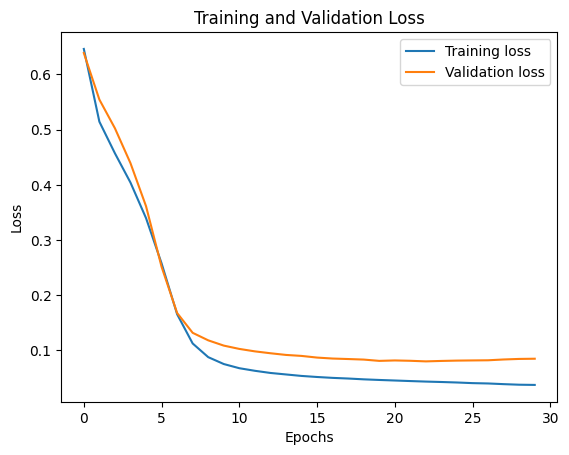

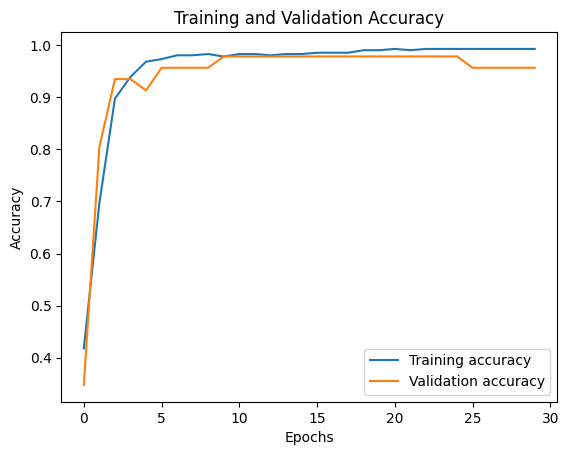

In [19]:
import matplotlib.pyplot as plt

# 損失曲線
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 準確率曲線
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## 提升模型準確率策略
* 調整激活函數、損失函數、優化器
* 增加訓練次數epochs
* 使用正則化，如Dropout
* 增加資料前處理
* 增加神經網路深度及神經元數
* 超參數調整



In [20]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

model_keras = Sequential()
model_keras.add(Dense(8, activation='relu', input_shape=(X_train.shape[1],)))
model_keras.add(Dropout(0.5))
model_keras.add(Dense(8, activation='relu', ))
model_keras.add(Dropout(0.5))
model_keras.add(Dense(1, activation='sigmoid'))

model_keras.compile(optimizer='adam',
          loss='binary_crossentropy',
          metrics=['accuracy'])

history = model_keras.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[EarlyStopping()])

Epoch 1/100
13/13 [==============================] - 2s 18ms/step - loss: 0.8270 - accuracy: 0.5403 - val_loss: 0.8460 - val_accuracy: 0.3043
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 0.7518 - accuracy: 0.5892 - val_loss: 0.7719 - val_accuracy: 0.3478
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 0.7244 - accuracy: 0.6064 - val_loss: 0.7109 - val_accuracy: 0.3696
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6523 - accuracy: 0.6601 - val_loss: 0.6601 - val_accuracy: 0.4130
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6055 - accuracy: 0.7042 - val_loss: 0.6098 - val_accuracy: 0.5870
Epoch 6/100
13/13 [==============================] - 0s 8ms/step - loss: 0.5806 - accuracy: 0.7017 - val_loss: 0.5612 - val_accuracy: 0.7609
Epoch 7/100
13/13 [==============================] - 0s 7ms/step - loss: 0.5341 - accuracy: 0.7653 - val_loss: 0.5076 - val_accuracy: 0.8478
Epoch 8/100


In [21]:
from sklearn.metrics import roc_auc_score
# 測試資料準確率
loss, accuracy = model_keras.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')

# 測試資料AUC
y_pred_proba = model_keras.predict(X_test).ravel()
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f'Test AUC: {auc_score:.4f}')

Test Accuracy: 0.9737
4/4 [==============================] - 0s 3ms/step
Test AUC: 0.9967


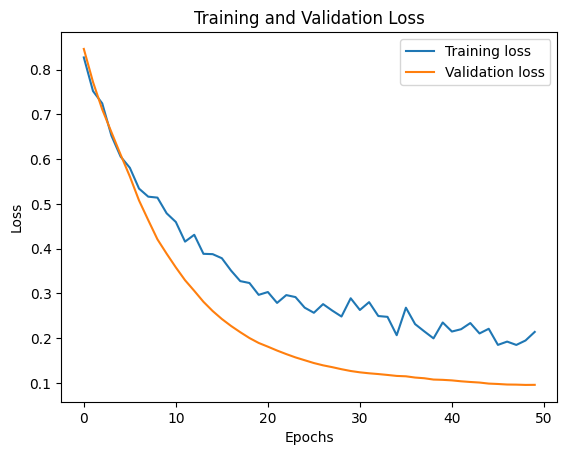

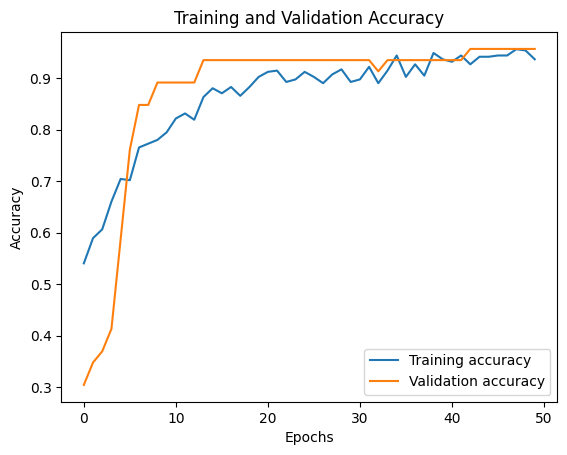

In [22]:
import matplotlib.pyplot as plt

# 損失曲線
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 準確率曲線
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


 ## Pytorch版本

In [23]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import roc_auc_score

# 建立模型
class torchBCM(nn.Module):
    def __init__(self, input_shape):
        super(torchBCM, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(input_shape, 8),
            nn.ReLU(),
            nn.Dropout(0.5)
        )
        self.layer2 = nn.Sequential(
            nn.Linear(8, 8),
            nn.ReLU(),
            nn.Dropout(0.5)
        )
        self.output = nn.Linear(8, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.output(x)
        return self.sigmoid(x)

model = torchBCM(input_shape=X_train.shape[1])

# 設定損失函數及優化器
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

# 將資料轉為張量
tensor_x_train = torch.Tensor(X_train)
tensor_y_train = torch.Tensor(y_train.values).unsqueeze(1)  # 要增加一個維度，二元問題中pytorch獨有
tensor_x_test = torch.Tensor(X_test)
tensor_y_test = torch.Tensor(y_test.values).unsqueeze(1)

train_dataset = TensorDataset(tensor_x_train, tensor_y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

# 模型訓練
model.train()
num_epochs = 100
for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        # 前向傳播
        outputs = model(inputs)
        loss = loss_fn(outputs, targets)

        # 反向傳播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 評估測試資料
model.eval()
with torch.no_grad():
    inputs = tensor_x_test
    outputs = model(inputs).cpu()
    predicted = (outputs > 0.5).float()
    accuracy = (predicted.eq(tensor_y_test).sum() / float(tensor_y_test.shape[0])).item()
    print(f'Test Accuracy: {accuracy:.4f}')

    auc_score = roc_auc_score(y_test, outputs.numpy())
    print(f'Test AUC: {auc_score:.4f}')


Epoch [10/100], Loss: 0.5704
Epoch [20/100], Loss: 0.4114
Epoch [30/100], Loss: 0.1405
Epoch [40/100], Loss: 0.1560
Epoch [50/100], Loss: 0.0737
Epoch [60/100], Loss: 0.0659
Epoch [70/100], Loss: 0.0189
Epoch [80/100], Loss: 0.1641
Epoch [90/100], Loss: 0.1483
Epoch [100/100], Loss: 0.0490
Test Accuracy: 0.9912
Test AUC: 0.9974


# 實戰-California Housing 加州房價預測
使用加州房價資料進行數值預測實作<br>
https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [24]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [25]:
# 載入數據
housing = fetch_california_housing(as_frame=True)
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X, y = housing.data, housing.target

# 特徵標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 切訓練及測試資料
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [26]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

# 建立模型
model_keras = Sequential()
model_keras.add(Dense(8, activation='relu', input_shape=(X_train.shape[1],)))
model_keras.add(Dropout(0.5))
model_keras.add(Dense(8, activation='relu'))
model_keras.add(Dropout(0.5))
model_keras.add(Dense(1))

# 編譯模型
model_keras.compile(optimizer='adam',
          loss='mean_squared_error',
          metrics=['mean_squared_error'])

# 訓練模型並保存歷史記錄
history = model_keras.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[EarlyStopping()])

Epoch 1/100
465/465 [==============================] - 3s 4ms/step - loss: 4.0129 - mean_squared_error: 4.0129 - val_loss: 1.3446 - val_mean_squared_error: 1.3446
Epoch 2/100
465/465 [==============================] - 2s 4ms/step - loss: 2.2578 - mean_squared_error: 2.2578 - val_loss: 1.0164 - val_mean_squared_error: 1.0164
Epoch 3/100
465/465 [==============================] - 2s 4ms/step - loss: 1.5645 - mean_squared_error: 1.5645 - val_loss: 0.8484 - val_mean_squared_error: 0.8484
Epoch 4/100
465/465 [==============================] - 2s 5ms/step - loss: 1.4921 - mean_squared_error: 1.4921 - val_loss: 0.8313 - val_mean_squared_error: 0.8313
Epoch 5/100
465/465 [==============================] - 2s 4ms/step - loss: 1.3275 - mean_squared_error: 1.3275 - val_loss: 0.8122 - val_mean_squared_error: 0.8122
Epoch 6/100
465/465 [==============================] - 2s 4ms/step - loss: 1.1417 - mean_squared_error: 1.1417 - val_loss: 0.7775 - val_mean_squared_error: 0.7775
Epoch 7/100
465/465 [=

In [28]:
model_keras.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 8)                 72        
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_13 (Dense)            (None, 8)                 72        
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 153 (612.00 Byte)
Trainable params: 153 (612.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# 評估模型
mse_test = model_keras.evaluate(X_test, y_test)
print(f'Test MSE: {mse_test[0]:.4f}')

129/129 [==============================] - 0s 2ms/step - loss: 0.6960 - mean_squared_error: 0.6960
Test MSE: 0.6960


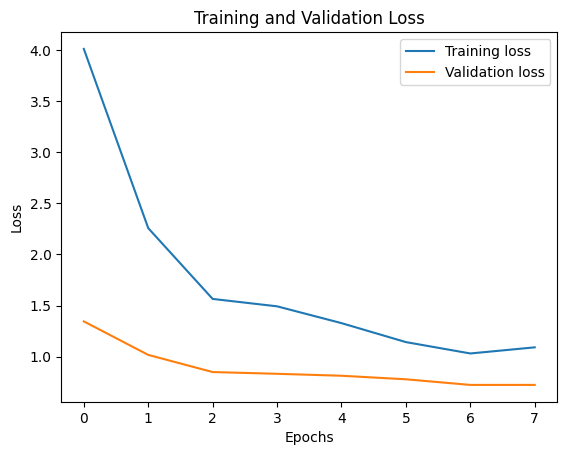

In [30]:
import matplotlib.pyplot as plt

# 損失曲線
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 比較LGBM模型
比較機器學習與深度學習的演算法，在不調整超參數的前提下，誰的表現比較好

In [31]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

lgb_train = lgb.Dataset(X_train, y_train)

# 模型參數
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression', #數值預測
    'metric': {'mse'},
    'num_leaves': 32, #葉子最大數量，複雜程度
    'learning_rate': 0.01 #
}

# 訓練模型
gbm = lgb.train(params,
          lgb_train,
          num_boost_round=100 #樹的數量
          )


# 預測
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
mse_test = mean_squared_error(y_test, y_pred)
print(f'The mean squared error (MSE) on test set: {mse_test}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001872 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947
The mean squared error (MSE) on test set: 0.514552079425033


## Pytorch版本

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# 建立模型
class torchLIN(nn.Module):
    def __init__(self, input_dim):
        super(torchLIN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(input_dim, 8),
            nn.ReLU(),
            nn.Dropout(0.5)
        )
        self.layer2 = nn.Sequential(
            nn.Linear(8, 8),
            nn.ReLU(),
            nn.Dropout(0.5)
        )
        self.output = nn.Linear(8, 1)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.output(x)
        return x

# 數據轉為張量
tensor_x_train = torch.Tensor(X_train)
tensor_y_train = torch.Tensor(y_train.values)
tensor_x_test = torch.Tensor(X_test)
tensor_y_test = torch.Tensor(y_test.values)

tensor_train = TensorDataset(tensor_x_train, tensor_y_train)
tensor_test = TensorDataset(tensor_x_test, tensor_y_test)

# 建立訓練及測試資料集
train_loader = DataLoader(dataset=tensor_train, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=tensor_test, batch_size=32, shuffle=False)

# 輸入模型
model = torchLIN(input_dim=X_train.shape[1])

# 定義優化器及損失函數
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()

# 訓練模型
n_epochs = 30

for epoch in range(n_epochs):
    model.train()
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}: Loss: {loss.item():.4f}')

# 測試模型
model.eval()
test_loss = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        test_loss += loss_fn(output, target).item()

test_loss /= len(test_loader.dataset)
print(f'Test MSE: {test_loss:.4f}')

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1: Loss: 2.2167
Epoch 2: Loss: 2.2149
Epoch 3: Loss: 2.1913
Epoch 4: Loss: 1.9670
Epoch 5: Loss: 1.5707
Epoch 6: Loss: 1.4317
Epoch 7: Loss: 1.3459
Epoch 8: Loss: 1.5229
Epoch 9: Loss: 1.5844
Epoch 10: Loss: 1.5845
Epoch 11: Loss: 1.2297
Epoch 12: Loss: 1.1212
Epoch 13: Loss: 1.3061
Epoch 14: Loss: 1.6851
Epoch 15: Loss: 0.6977
Epoch 16: Loss: 1.5923
Epoch 17: Loss: 1.6056
Epoch 18: Loss: 1.0574
Epoch 19: Loss: 0.9001
Epoch 20: Loss: 1.2593
Epoch 21: Loss: 1.7633
Epoch 22: Loss: 1.0621
Epoch 23: Loss: 1.4927
Epoch 24: Loss: 1.6385
Epoch 25: Loss: 2.0484
Epoch 26: Loss: 1.0886
Epoch 27: Loss: 0.9049
Epoch 28: Loss: 1.0274
Epoch 29: Loss: 0.9432
Epoch 30: Loss: 1.2167
Test MSE: 0.0409
